In [41]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics


In [44]:
df = pd.read_csv('data/bankloan.csv')

In [45]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [46]:
df['default'].value_counts()

0    517
1    183
Name: default, dtype: int64

In [47]:
count_no_sub = len(df[df['default']==0])
count_sub = len(df[df['default']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 73.85714285714286
percentage of subscription 26.142857142857146


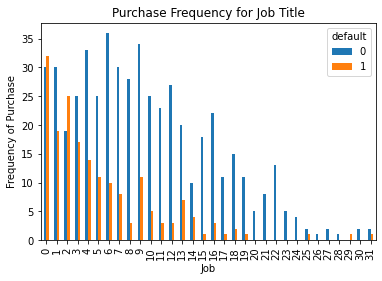

In [48]:
%matplotlib inline
pd.crosstab(df.employ,df.default).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

In [49]:
X = df[['debtinc', 'creddebt']]
y = df.default

In [52]:
logreg = LogisticRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [53]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.671122
         Iterations 4
                        Results: Logit
Model:              Logit            Pseudo R-squared: -0.168  
Dependent Variable: default          AIC:              941.5714
Date:               2022-03-25 20:40 BIC:              946.1224
No. Observations:   700              Log-Likelihood:   -469.79 
Df Model:           0                LL-Null:          -402.18 
Df Residuals:       699              LLR p-value:      nan     
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     4.0000                                     
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
debtinc     -0.0351    0.0065  -5.3903  0.0000  -0.0479  -0.0224



In [54]:
X_train

518     2.9
344    13.4
252     1.9
332     2.5
563     1.3
       ... 
98      6.3
322     1.6
382    16.0
365     1.9
510    19.1
Name: debtinc, Length: 560, dtype: float64